In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [ ]:
# Step 1: Dataset Loading and Inspection
# 1. Load the dataset (insurance.csv) into a Pandas DataFrame.
# 2. Display the first five rows of the dataset.
# 3. Use .info() and .describe() to summarize the dataset.
# 4. Identify:
# o Target variable
# o Feature variables

# Briefly comment on the type of problem and the nature of the dataset.

In [112]:
# 1. Load the dataset (insurance.csv) into a Pandas DataFrame.
# 2. Display the first five rows of the dataset.
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,NaN,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [114]:
# 3. Use .info() and .describe() to summarize the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1367 non-null   float64
 1   sex       1367 non-null   object 
 2   bmi       1367 non-null   float64
 3   children  1438 non-null   int64  
 4   smoker    1438 non-null   object 
 5   region    1367 non-null   object 
 6   charges   1438 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 78.8+ KB


In [116]:
df.describe()

,age,bmi,children,charges
count,1367.000000,1367.000000,1438.000000,1438.000000
mean,39.389905,30.466240,1.197497,14263.806370
std,14.025264,6.177811,1.307840,12869.081884
min,18.000000,15.000000,0.000000,1121.873900
25%,27.000000,26.030000,0.000000,4908.572200
50%,40.000000,30.250000,1.000000,9794.877050
75%,51.000000,34.457500,2.000000,19135.377290
max,64.000000,53.130000,5.000000,63770.428010


In [118]:
df.describe(include='object')

,sex,smoker,region
count,1367,1438,1367
unique,2,2,4
top,male,no,southeast
freq,699,1118,369


In [120]:
# 4. Identify:
# o Target variable
# o Feature variables
target = "charges"
features = [ c for c in df.columns if c!= target]
#X = df[features]
#y = df[target]

print("Target column:", target)
print("Features columns:",features)

Target column: charges
Features columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [18]:
# Step 2: Data Preprocessing
# 2.1 Handling Missing Values
# • Check for missing or null values.
# • Handle missing values appropriately (if any).
# • Explain your approach.
# 2.2 Feature Encoding
# • Encode categorical variables such as:
# o sex
# o smoker
# o region
# • Use One-Hot Encoding or Label Encoding where appropriate.
# • Justify your encoding choice.
# 2.3 Feature Scaling
# • Apply standardization or normalization to numerical features.
# • Explain:
# Why feature scaling is important in regression models

In [122]:
#Handling missing values
df.isnull().sum()

age         71
sex         71
bmi         71
children     0
smoker       0
region      71
charges      0
dtype: int64

In [124]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,NaN,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1433,24.0,male,19.500,5,yes,southwest,45255.58000
1434,26.0,female,24.200,4,no,southwest,4181.43000
1435,41.0,female,33.600,5,no,northeast,15486.23000
1436,18.0,male,33.000,1,no,northeast,47619.75000


In [126]:
# • Handle missing values appropriately (if any).
#For Numeric column we use median
df['age'] = df["age"].fillna(df["age"].median())

In [128]:
df.isnull().sum()

age          0
sex         71
bmi         71
children     0
smoker       0
region      71
charges      0
dtype: int64

In [130]:
df['bmi'] = df["bmi"].fillna(df["bmi"].median())

In [132]:
#for categorical column we use mode
df['sex'] = df["sex"].fillna(df["sex"].mode()[0])
df['region'] = df["region"].fillna(df["region"].mode()[0])

In [134]:
df.isnull().sum()
#Need to clean data and missing values as ML can't handle missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# 2.2 Feature Encoding
# • Encode categorical variables such as:
# o sex
# o smoker
# o region
# • Use One-Hot Encoding or Label Encoding where appropriate.
# • Justify your encoding choice.

In [ ]:
#We use one-Hot encoding for converting all the categorical values into numeric values , ML can not handle categorical values

In [136]:
df = pd.get_dummies(df,drop_first=True)
df.shape

(1438, 9)

In [138]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,True,True,False,False,True
1,18.0,33.770,1,1725.55230,True,False,False,True,False
2,28.0,33.000,3,4449.46200,True,False,False,True,False
3,33.0,22.705,0,21984.47061,True,False,True,False,False
4,32.0,28.880,0,3866.85520,True,False,True,False,False


In [ ]:
# 2.3 Feature Scaling
# • Apply standardization or normalization to numerical features.
# • Explain:
# Why feature scaling is important in regression models

In [ ]:
#we will use standarization if we use the dataset directly , features with larger ranges can decrease rhe learning process

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["age","bmi","children"]] =  scaler.fit_transform(df[["age","bmi","children"]])

In [ ]:
# Why feature scaling is important in regression models
# 1 - without scaling , variables with higher larger dataset values (eg:BMI) can dominate those with smaller values
# 2- faster and stable training 

In [56]:
# Step 3: Exploratory Data Analysis (EDA)
# Perform EDA to understand the dataset:
# 1. Plot the distribution of the charges variable.
# 2. Analyze the relationship between:
# o age vs charges
# o bmi vs charges
# o smoker vs charges
# 3. Generate a correlation heatmap.
# 4. Highlight two key insights obtained from the analysis.

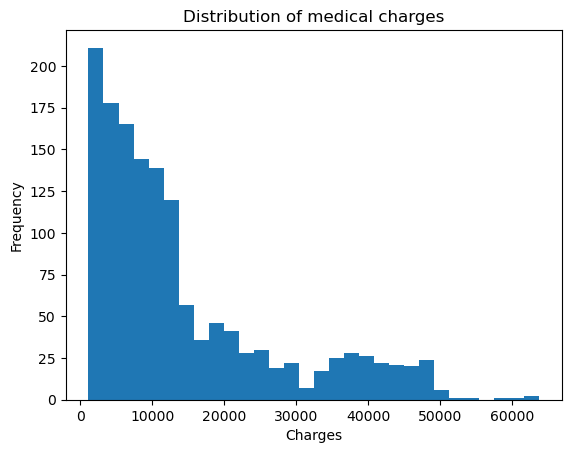

In [146]:
plt.figure()
plt.hist(df["charges"],bins=30)
plt.title("Distribution of medical charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

#The distribution shows most people have moderate to low charges , but a some people have very high medical cost. 

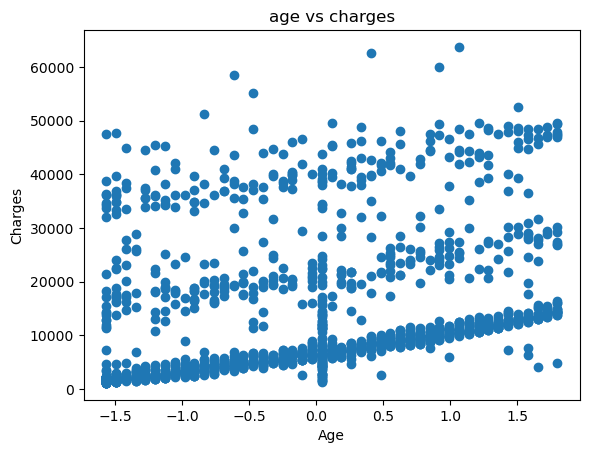

In [144]:
# o age vs charges
plt.figure()
plt.scatter(df["age"],df["charges"])
plt.title("age vs charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()
#charges increase with age as age increases

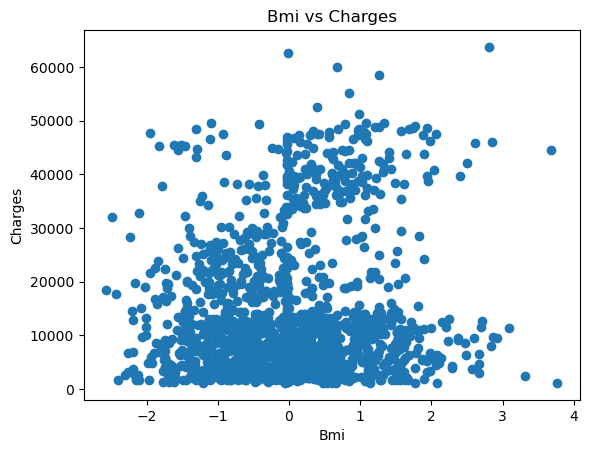

In [148]:
#bmi vs charges
plt.figure()
plt.scatter(df["bmi"],df["charges"])
plt.title("Bmi vs Charges")
plt.xlabel("Bmi")
plt.ylabel("Charges")
plt.show()

<Figure size 640x480 with 0 Axes>

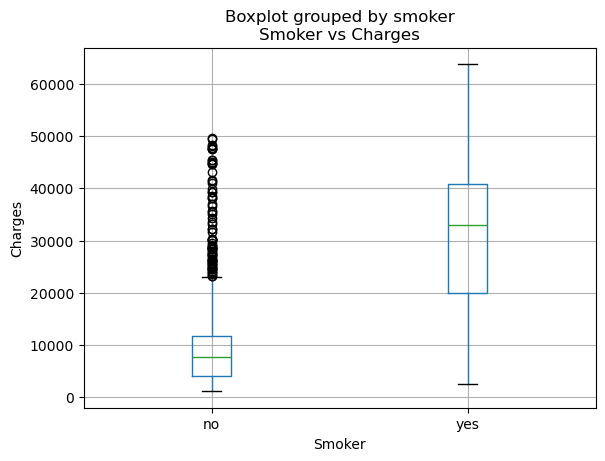

In [72]:
#smoker vs charges
#had a little confusion on this
# df = pd.read_csv("insurance.csv") #After encoding column name changes so need to load file
# plt.figure()
# df.boxplot(column="charges" , by ="smoker")
# plt.title("Smoker vs Charges")
# plt.xlabel("Smoker")
# plt.ylabel("Charges")
# plt.show()

#Smokers have much higher medical cost compared to non smokers

In [150]:
#Smokers have much higher medical cost compared to non smokers
#charges increase with age as age increases
df.shape #need to run one-hot encoding again 

(1438, 9)

In [ ]:
# Step 4: Model Building
# 4.1 Data Splitting
# • Split the dataset into:
# o Training set (80%)
# o Testing set (20%)

# 4.2 Model Training
# • Train a Multiple Linear Regression model.
# • Display model coefficients and intercept.
# • Write the regression equation

In [152]:
X = df.drop(columns=["charges"])
y = df["charges"]

In [154]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.493754,-0.424417,-0.915948,True,True,False,False,True
1,-1.566905,0.550448,-0.151062,True,False,False,True,False
2,-0.835391,0.422569,1.378709,True,False,False,True,False
3,-0.469634,-1.287181,-0.915948,True,False,True,False,False
4,-0.542786,-0.261663,-0.915948,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1433,-1.127997,-1.819454,2.908479,True,True,False,False,True
1434,-0.981694,-1.038898,2.143594,False,False,False,False,True
1435,0.115577,0.522215,2.908479,False,False,False,False,False
1436,-1.566905,0.422569,-0.151062,True,False,False,False,False


In [156]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1433    45255.58000
1434     4181.43000
1435    15486.23000
1436    47619.75000
1437    44732.66000
Name: charges, Length: 1438, dtype: float64

In [158]:
# • Split the dataset into:
# o Training set (80%)
# o Testing set (20%)
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=42)

In [160]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
538,0.481334,-0.399506,-0.151062,False,False,False,True,False
174,-1.127997,0.479865,-0.915948,False,False,True,False,False
1390,-1.127997,-1.121936,-0.915948,False,True,False,False,True
303,-0.835391,0.422569,0.613823,False,False,False,True,False
1128,-0.396483,0.389354,-0.151062,True,False,False,False,True
...,...,...,...,...,...,...,...,...
1095,-1.566905,0.148544,2.143594,False,False,False,False,False
1130,-0.030726,-1.093703,2.908479,False,False,False,True,False
1294,1.359151,-0.876974,-0.915948,True,False,False,False,False
860,-0.177028,2.847276,0.613823,False,True,False,False,True


In [162]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
51,-1.347451,0.527197,0.613823,False,False,True,False,False
1322,1.651757,1.390791,-0.915948,True,False,False,True,False
923,-0.396483,0.890073,-0.915948,True,False,True,False,False
1302,-1.054845,-1.603555,-0.151062,False,False,False,False,True
701,0.773940,2.373129,-0.915948,False,False,False,False,False
...,...,...,...,...,...,...,...,...
471,-1.566905,-0.056559,-0.915948,False,False,False,False,False
1384,-0.981694,0.322924,1.378709,False,True,True,False,False
221,0.993394,0.464088,-0.915948,False,False,False,False,False
113,-1.347451,0.874295,-0.915948,False,False,True,False,False


In [164]:
model = LinearRegression()
model

LinearRegression()

In [166]:
model.fit(X_train,y_train)

LinearRegression()

In [168]:
y_pred = model.predict(X_test)

In [ ]:
# Step 5: Model Evaluation
# Evaluate the model on the test dataset using:
# • Mean Absolute Error (MAE)
# • Mean Squared Error (MSE)
# • Root Mean Squared Error (RMSE)
# • R-squared (R2)

In [174]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE): ",root_mean_squared_error(y_test,y_pred))
print("R-squared : ",r2_score(y_test,y_pred))

Mean Absolute Error:  5516.14354717272
Mean Squared Error:  64124102.05192942
Root Mean Squared Error (RMSE):  8007.752621799042
R-squared :  0.6534854893901867
